## Bradley-Terry model tests

On va d'abord tenter de produire des données factices: on associe à chaque joueur sa force

In [1]:
import numpy as np

X = np.random.normal(0, 6, size=100)
X = (X - np.min(X)) / (np.max(X) - np.min(X))

X.sort()

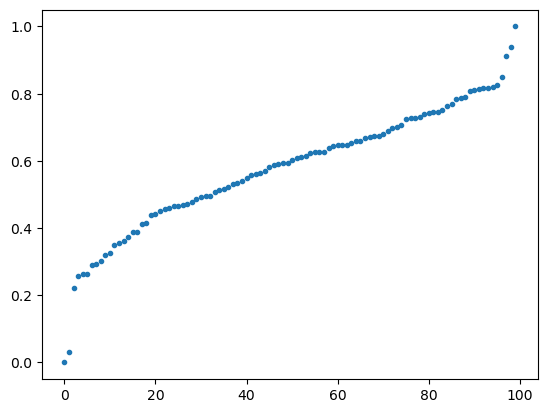

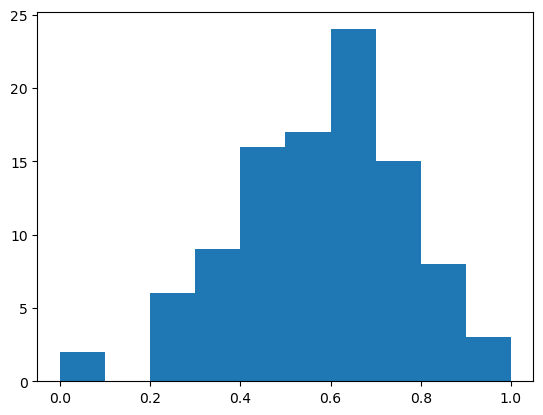

In [2]:
import matplotlib.pyplot as plt

plt.plot(X,'.')
plt.show()
plt.hist(X)
plt.show()

In [3]:
def BT_proba(Vi,Vj):
    return Vi/(Vi+Vj)

def BT_score(i,X):
    Vi = X[i]
    Score = 0
    for j in range(len(X)):
        if i != j:
            Vj = X[j]
            proba = BT_proba(Vi,Vj)
            Score += np.random.binomial(1,proba)
    return Score

def BT_tournament(X):
    Scores = []
    for i in range(len(X)):
        Scores.append(BT_score(i,X))
    winner = Scores.index(max(Scores))
    return Scores, winner


In [4]:
print(BT_score(0,X))
print(BT_tournament(X))

0
([0, 7, 26, 32, 38, 42, 39, 33, 49, 34, 30, 34, 36, 44, 36, 42, 44, 34, 43, 39, 46, 45, 48, 44, 43, 48, 47, 47, 39, 37, 49, 45, 41, 49, 58, 49, 50, 42, 53, 47, 54, 57, 40, 49, 54, 53, 54, 49, 45, 47, 55, 56, 54, 56, 43, 53, 60, 55, 44, 56, 53, 52, 51, 63, 48, 57, 51, 54, 50, 54, 50, 60, 52, 60, 61, 53, 61, 54, 67, 54, 61, 60, 66, 50, 55, 54, 55, 62, 60, 55, 64, 55, 64, 66, 59, 59, 54, 60, 67, 65], 78)


#### Test de la classe qu'on vient de coder

In [12]:
from Bradley_Terry import BT_Tournament

tournoi = BT_Tournament(X)

print(tournoi.compute_probs(1,35))
print(tournoi.score(1))

print(tournoi.tournament())

0.055858987294607546
7


NameError: name 'X' is not defined

## Sur un jeu de données d'un tournoi réel

In [6]:
import pandas as pd

ligue1 = pd.read_csv('https://raw.githubusercontent.com/datasets/football-datasets/refs/heads/main/datasets/ligue-1/season-2223.csv')
ligue1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/22,Lyon,Ajaccio,2,1,H,2,1,H,NaN,...,6,4,10,18,4,3,1,6,1,1
1,06/08/22,Strasbourg,Monaco,1,2,A,0,1,A,NaN,...,7,11,18,15,3,7,0,2,0,0
2,06/08/22,Clermont,Paris SG,0,5,A,0,3,A,NaN,...,1,12,13,13,0,6,2,1,0,0
3,07/08/22,Toulouse,Nice,1,1,D,1,0,H,NaN,...,4,4,10,8,6,3,1,2,0,0
4,07/08/22,Angers,Nantes,0,0,D,0,0,D,NaN,...,6,4,15,13,3,6,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,03/06/23,Nantes,Angers,1,0,H,1,0,H,NaN,...,7,1,12,13,8,1,1,0,0,0
376,03/06/23,Nice,Lyon,3,1,H,3,1,H,NaN,...,6,7,8,12,3,2,0,1,0,0
377,03/06/23,Paris SG,Clermont,2,3,A,2,2,D,NaN,...,6,5,17,11,6,2,2,1,0,0
378,03/06/23,Reims,Montpellier,1,3,A,1,0,H,NaN,...,5,8,16,9,4,7,1,2,0,0


Nettoyage de toute cette merde

In [7]:
ligue1 = ligue1.dropna(axis='columns')
ligue1

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,05/08/22,Lyon,Ajaccio,2,1,H,2,1,H,11,...,6,4,10,18,4,3,1,6,1,1
1,06/08/22,Strasbourg,Monaco,1,2,A,0,1,A,11,...,7,11,18,15,3,7,0,2,0,0
2,06/08/22,Clermont,Paris SG,0,5,A,0,3,A,7,...,1,12,13,13,0,6,2,1,0,0
3,07/08/22,Toulouse,Nice,1,1,D,1,0,H,6,...,4,4,10,8,6,3,1,2,0,0
4,07/08/22,Angers,Nantes,0,0,D,0,0,D,16,...,6,4,15,13,3,6,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,03/06/23,Nantes,Angers,1,0,H,1,0,H,11,...,7,1,12,13,8,1,1,0,0,0
376,03/06/23,Nice,Lyon,3,1,H,3,1,H,16,...,6,7,8,12,3,2,0,1,0,0
377,03/06/23,Paris SG,Clermont,2,3,A,2,2,D,16,...,6,5,17,11,6,2,2,1,0,0
378,03/06/23,Reims,Montpellier,1,3,A,1,0,H,11,...,5,8,16,9,4,7,1,2,0,0


Fabrication d'un dataframe dans lequel on agrège les victoires de chaque équipe.

In [8]:
home_wins = ligue1[ligue1['FTR'] == 'H'].groupby('HomeTeam').size().reset_index(name='HomeWins').rename(columns={'HomeTeam': 'Team'})
away_wins = ligue1[ligue1['FTR'] == 'A'].groupby('AwayTeam').size().reset_index(name='AwayWins').rename(columns={'AwayTeam': 'Team'})

wins = pd.merge(home_wins,away_wins, on='Team')
wins['TotalWins'] = wins['HomeWins'] + wins ['AwayWins']
wins

,Team,HomeWins,AwayWins,TotalWins
0,Ajaccio,4,3,7
1,Angers,3,1,4
2,Auxerre,5,3,8
3,Brest,7,4,11
4,Clermont,9,8,17
5,Lens,17,8,25
6,Lille,13,6,19
7,Lorient,9,6,15
8,Lyon,10,8,18
9,Marseille,10,12,22


<AxesSubplot: xlabel='TotalWins', ylabel='Count'>

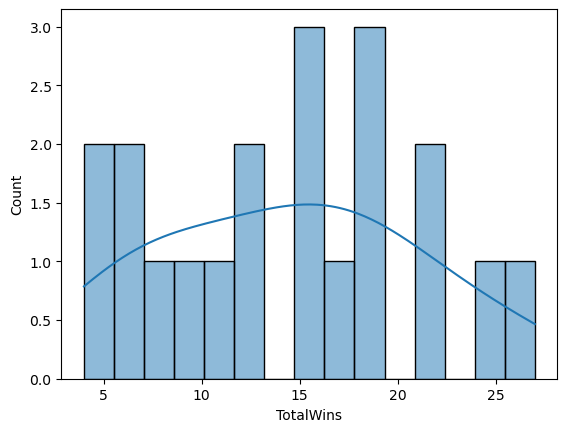

In [9]:
import seaborn as sns

sns.histplot(wins['TotalWins'],bins=15,kde=True)

In [10]:
proba_Ajaccio = BT_score(0,wins['TotalWins'])
proba_Ajaccio

10

Division entre les deux parties de la saison (que les matchs aller)

In [11]:
ligue1.

SyntaxError: invalid syntax (629291846.py, line 1)